<a href="https://colab.research.google.com/github/EddyGiusepe/Machine_Learning/blob/main/4_ML_Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Machine Learning: Support Vector Machines</h2>



Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

# Máquina de Vetores de Suporte ([Support Vector Machine: SVM](https://medium.com/@msremigio/m%C3%A1quinas-de-vetores-de-suporte-svm-77bb114d02fc))

É um algoritmo de aprendizado de máquina supervisionado que pode ser usado para desafios de `classificação` ou `regressão`. **No entanto, é usado principalmente em problemas de classificação.**

Essencialmente, o algoritmo de SVM é responsável por encontrar a melhor fronteira de separação entre classes/rótulos possível para um dado conjunto de dados que sejam linearmente separáveis. Para o SVM, as diversas fronteiras de separação possíveis que são capazes de separar completamente as classes são chamadas de **hiperplanos**. Dessa forma, o SVM busca encontrar o melhor hiperplano para um dado dataset cujas classes são linearmente separáveis. Podemos visualizar essa ideia através do cenário base de classificação (binária). 


Em um dataset bidimensional, o hiperplano é uma reta. Em um dataset tridimensional, o hiperplano é de fato um plano. E assim sucessivamente.

![](https://www.reneshbedre.com/assets/posts/svm/svm_linear.webp)

# Classificação Linear com SVM

Enquanto os modelos de Regressão Linear se basean na ideia de MINIMIZAR o número de erros, o algoritmo SVM intenta MAXIMIZAR a distância entre as fronteiras de decisão e os Dados de treinamento: A margem.

![](https://aprenderdatascience.com/wp-content/uploads/2021/02/A2-1.png)

![](https://miro.medium.com/max/809/1*GPFxwsE4cqcPxul4GWGp1A.png)

Adicionar mais Dados fora do Margem não afeita ao modelo já que está totalmente determinado pelas instâncias localizadas nos limites da Fronteira: <font color="yellow">O VETORES DE SUPORTE</font>. Isto só funciona se os Dados são linearmente separáveis, em caso contrário devemos aceitar um certo número de erros (na seção seguinte veremos como fazer isso com um modelo linear).

Em `scikit-learn` podemos usar o modelo [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) para treinar um classificador linear com SVM. A seguir veremos um exemplo de como ajustar o número de erros aceitáveis na classificação (instâncias dentro da Margem) com o Dataset Iris (já usados em outros scripts).

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings(action='ignore')



# Carregamos o Dataset (usamos dois features e apenas uma classe)
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris virginica

print("shape de X: ", X.shape)
print("shape de y: ", y.shape)
print("")

# Normalizar nossos Datos 
scaler = StandardScaler()

# SVMs (dois diferentes valores de C). C=1 é por Default. C é um parâmetro de Regularização
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

# Treinar os seguintes dois modelos
scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])

scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

print(scaled_svm_clf1.fit(X, y))
print("")
print(scaled_svm_clf2.fit(X, y))

shape de X:  (150, 2)
shape de y:  (150,)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])


<font color="yellow">Algumas LOSS</font>

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_sgd_loss_functions_001.png)

In [14]:
# Extrair as fronteiras de decisão (não normalizadas)
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_

svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Calcular vetores de suporte
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

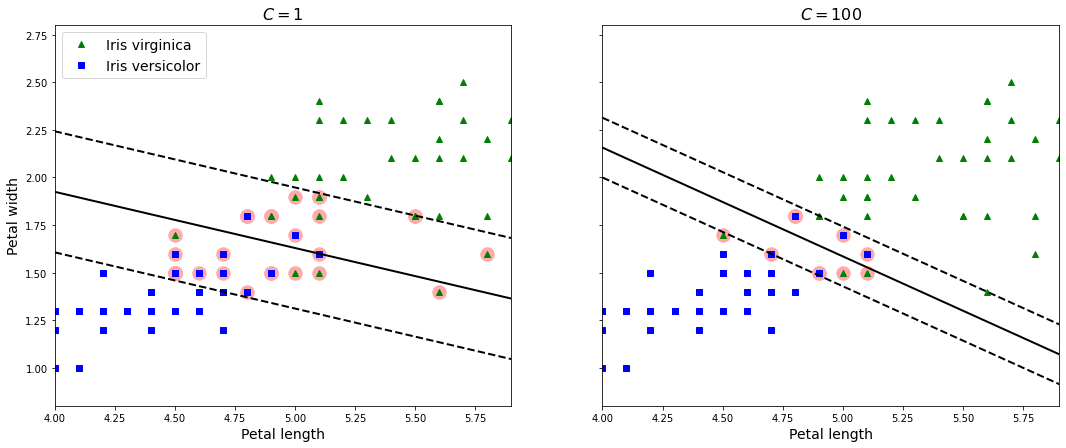

In [15]:
# Visualizar fronteiras de Decisão
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(18,7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.show()

Para saber se uma instância $\bf{x}$ pertence a uma clase ou outra, podemos calcular a fronteira de decisão $\mathbf{w}^T \mathbf{x} + b = w_1 x_1 + w_2 x_2 + ... + w_n x_n + b$, onde $\bf{w}$ são os parâmetros do modelo, e $b$ é o **bias**. Logo, podemos atribuir a clase em função de: 

\begin{equation}
\hat{y} = \left\{
  \begin{array}{lcr}
  0 & \textrm{si} & \mathbf{w}^T \mathbf{x} + b < 0\\
  1 & \textrm{si} &  \mathbf{w}^T \mathbf{x} + b \geq 0
  \end{array} \right.
\end{equation}


Treinar un algoritmo de **SVM linear** consiste em achar os valores de $\bf{w}$ e $b$ que maximizem a margem e à vez que minimizen o número de erros. Assumindo que não queremos nenhum erro, precisamos que a fronteira de decisão seja maior que $1$ para todas as amostras da classe positiva e menor que $-1$ para as amostras negativas. Isto pode expressar-se como $t^{(i)}(\mathbf{w}^T \mathbf{x} + b)\geq 1$ onde $t^{(i)}=-1$ para as amostras negativas e $t^{(i)}=1$ para as amostras positivas. Para permitir erros, se pode adicionar a **slack variable** e o hyperparâmetro <font color="yellow">$C$</font> para ajustar o número de erros admissíveis. O problema se formaliza da maneria seguinte:

\begin{equation}
  \begin{array}{ll}
    \underset{\mathbf{w},b,\zeta}{\textrm{minimize}} & \frac{1}{2} \mathbf{w}^T \mathbf{w} + C \sum_{j=1}^N \zeta^{(j)}  \\
    \textrm{subject to} & t^{(j)}(\mathbf{w}^T \mathbf{x}^{(j)} + b)\geq 1 - \zeta^{(j)} & \textrm{and} & \zeta^{(j)} \geq 0 & \textrm{for} & i = 1, 2, ..., N
  \end{array}
\end{equation}



O qual tem a forma do problema de otimização quadrática com restrições lineares, cuja solução pode achar-se através de programación cuadrática (**Quadratic Programming* - QP). Ainda assim, o algoritmo SVM cumpre as condições para resolver o problema na forma dual (**dual form**), o qual permite achar soluções mais rápidas e también permite o uso do *kernel trick* (que veremos mais para frente).

\begin{equation}
  \begin{array}{l}
    \underset{\alpha}{\textrm{minimize}} & \frac{1}{2} \sum_{i=1}^N \sum_{j=1}^N \alpha^{(i)}\alpha^{(j)}t^{(i)}t^{(j)}\mathbf{x}^{(i)T}\mathbf{x}^{(j)} - \sum_{i=1}^N \alpha^{(i)} \\
    \textrm{subject to} & \alpha^{(i)} \geq 0 \ \ \textrm{for} \ \ i = 1, 2, ..., N
  \end{array}
\end{equation}

onde o vetor $\hat{\mathbf{\alpha}}$ minimiza a equação (usando um solver QP) e os parâmetros do SVM podem calcular-se como:

\begin{equation}
    \hat{\mathbf{w}} = \sum_{j=1}^N \hat{\alpha}^{(j)} t^{(j)} \mathbf{x}^{(j)} \\
    \hat{b} = \frac{1}{N} \sum_{j=1,~ \hat{\alpha}^{(j)} > 0}^N (t^{(j)} - \hat{\mathbf{w}}^T \mathbf{x}^{(j)})
\end{equation}


<font color="yellow">As equações acima foi uma breve demonstração da equações envolvidas no SVM. Para nossa sorte nós usaremos a biblioteca `scikit-learn` onde está tudo implementado.</font> 

# Classificação não-linear com SVM

Uma das vantagens principais, também, dos algoritmos SVMs com respeito aos modelos lineares é que são capazes de representar **NÃO-LINEARIDADES**. Para isso, os Dados são projetados a uma nova representação de maior dimensão na qual a fronteira de decisão pode expresar-se como um **hyperplano**, o qual maximiza a distância entre ele mesmo e os pontos mais pertos de cada classe (os Vetores de suporte). 


![](https://mymlpics.s3.eu-de.cloud-object-storage.appdomain.cloud/linear_ploy.png)

![](https://miro.medium.com/max/1400/1*Fq4UInzakgo4cL5fvJBHcQ.png)

**Sendo mais explícito:**

Para separar esses tipos de exemplos (as figuras acima), o algoritmo primeiro faz uma <font color="yellow">transformação não-linear do espaço</font> para depois poder separar os grupos com um <font color="yellow">SVM linear</font>. Dessa forma, apesar da separação ser um **hiperplano no espaço das features** (como chamamos o espaço depois da transformação), no espaço das entradas (como chamamos o espaço inicial) a separação é <font color="yellow">não-linear</font>.

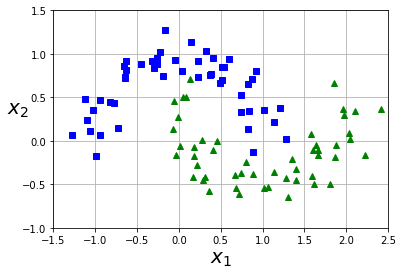

In [36]:
from sklearn.datasets import make_moons

# Criamos nosso Dataset. Criamos um Dataset com uma distribuição de Lua (Make moons)
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)


def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

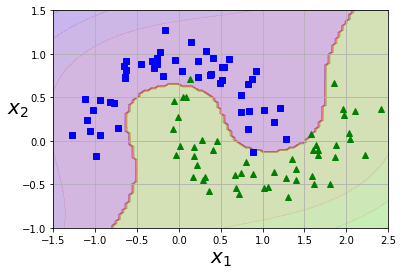

In [46]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)

    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

Os algoritmos de SVMs permitem incluir esta projeção diretamente no modelo. Esta técnica de projeçãose conhece como o <font color="yellow">kernel trick</font>. Para isso usamos o modelo [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [47]:
from sklearn.svm import SVC


poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [48]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

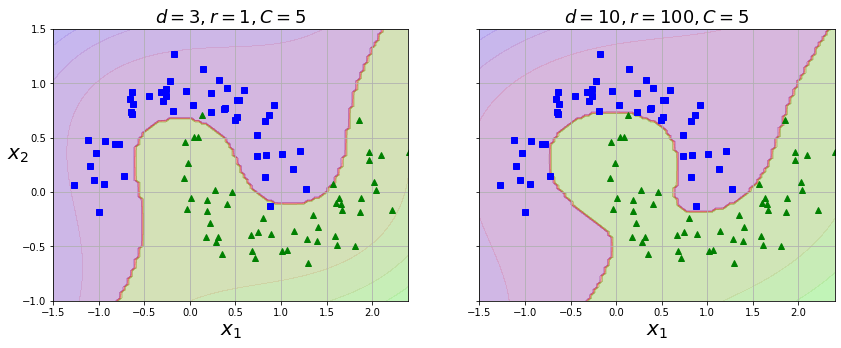

In [51]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

No entanto, o `kernel trick` mais usado consiste em calcular features adicionais usando funções de SIMILITUDE. Entre elas, a função `RBF` (Gaussian Radial Basis Function) é uma das comuns. 



\begin{equation}
  \phi_\gamma(\mathbf{x}, l) = e^{-\gamma || \mathbf{x}-l||^2}
\end{equation}

Usando as instâncias em $x_1=-2$ $~~$e$~~$ $x_1 = 1$ com $\gamma = 0.3$.


![](https://mymlpics.s3.eu-de.cloud-object-storage.appdomain.cloud/svm_kernel_gauss.png)

No caso limite, podemos usar todas as instâncias do dataset para ter certeza que os datos são linearmente separáveis, mas com tantas features como amostras.